# Bank Notes Classification
# AADHAR DUTTA 2K18/IT/001
# DHRUV YADAV 2K18/SE/056






##  Imports

In [ ]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB,ComplementNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn
from sklearn import datasets, metrics, model_selection, svm

## Loading Data

In [ ]:
df = pd.read_csv('data_banknote_authentication.txt', header = None)

## Data Visualization and Data Preprocessing

In [ ]:
print("Shape of the dataset : ",df.shape)
df

Shape of the dataset :  (1372, 5)


,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


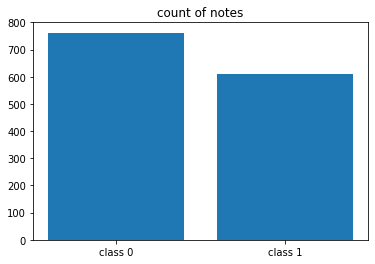

In [ ]:
counts = df[4].value_counts()
classes = ['class 0', 'class 1']
plt.title('count of notes')
plt.bar(classes,counts)
plt.show()

In [ ]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# checking for null values in the dataset.

df.isnull().sum()

# found 0 Null values

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
# Number of duplicates values

print("Number of duplicates : ", df.duplicated().sum())

Number of duplicates :  24


In [ ]:
# list of duplicated values

df[df.duplicated()]

,0,1,2,3,4
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


In [ ]:
# removing the duplicated values

df = df.drop_duplicates(keep='first')
print("Shape of dataframe after removing duplicates : ", df.shape)

Shape of dataframe after removing duplicates :  (1348, 5)


In [ ]:
print("Number of data points with class 0 : ",df[4].value_counts()[0])
print("Number of data points with class 1 : ", df[4].value_counts()[1])

Number of data points with class 0 :  738
Number of data points with class 1 :  610


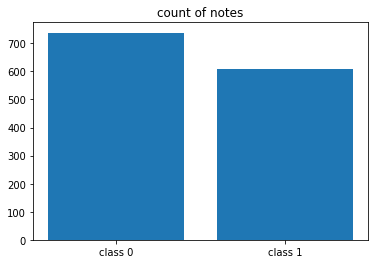

54.74777448071217


In [ ]:
counts = df[4].value_counts()
classes = ['class 0', 'class 1']
plt.title('count of notes')
plt.bar(classes,counts)
plt.show()
print(counts[0]/(counts[0]+counts[1])*100)

In [ ]:
Y = df[4]
Y = np.array(Y)
Y , Y.shape


(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), (1348,))

In [ ]:
X = df.drop(4, axis = 1)
X = np.array(X)
X , X.shape

(array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
        [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
        [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
        ...,
        [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
        [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
        [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]]), (1348, 4))

## Splitting Data into Train, Test Set

In [ ]:
# splitting the data into test, trian Set
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.50, random_state=1,stratify=Y)


In [ ]:
# shape of test, train dataset

print("X_train : ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("X_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

X_train :  (674, 4)
Y_train :  (674,)
X_test :  (674, 4)
Y_test :  (674,)


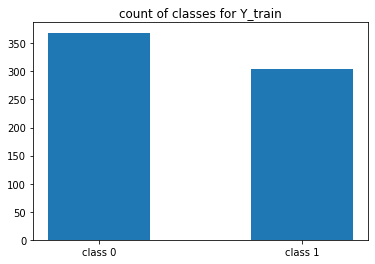

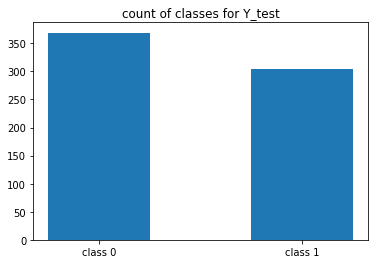

In [ ]:
# bar graph representing number of data points of each class in test, train set

_,counts = np.unique(Y_train,return_counts=True)
classes = ['class 0', 'class 1']
plt.title('count of classes for Y_train')
plt.bar(classes,counts,width = 0.5)
plt.show()


_,counts = np.unique(Y_test,return_counts=True)
classes = ['class 0', 'class 1']
plt.title('count of classes for Y_test')
plt.bar(classes,counts,width = 0.5)
plt.show()

## Scaling The Dataset

In [ ]:
# scaling the dataset for better results

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test

(array([[ 0.15868793,  0.27730858, -1.31367288, -0.28795799],
        [-0.65122439,  1.73743507, -0.2684993 , -2.84988993],
        [ 0.23431065,  0.38448481,  0.42841163,  0.92359515],
        ...,
        [ 0.14875369,  0.83334294, -0.23525441,  0.30505392],
        [-0.47141151, -1.64405172,  1.21905287,  0.6821517 ],
        [-1.33662133,  0.53730067, -0.54546447, -1.82438568]]),
 array([[-0.02039832,  0.88393969, -0.11829196,  0.19242169],
        [ 0.30064274,  0.27024897, -0.31055324,  0.46000082],
        [ 0.58040012, -0.64197967,  0.23196669,  0.48800272],
        ...,
        [-0.54458095,  1.54041543,  0.12361229, -2.20147866],
        [ 0.06519325,  0.92072489, -0.28411907,  0.31874495],
        [ 0.61880837, -1.00135334,  0.85738849,  0.32434649]]))

## Gaussian Naive Bayes Classifier (A)

In [ ]:
# fitting the model
# setting priors as mentioned in the question. Both classes are equiprobable

clf = GaussianNB(priors=[0.5, 0.5])
clf.fit(X_train, Y_train)

GaussianNB(priors=[0.5, 0.5])

In [ ]:
# finding predictions

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

## Evaluation Metrics

#### Confusion Matrix


In [ ]:
matrix = (confusion_matrix(Y_test,y_pred))
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        print(matrix[i][j],end = "     ")
    print()

320     49     
61     244     


CONFUSION MATRIX


Text(141.0, 0.5, 'Predicted class value')

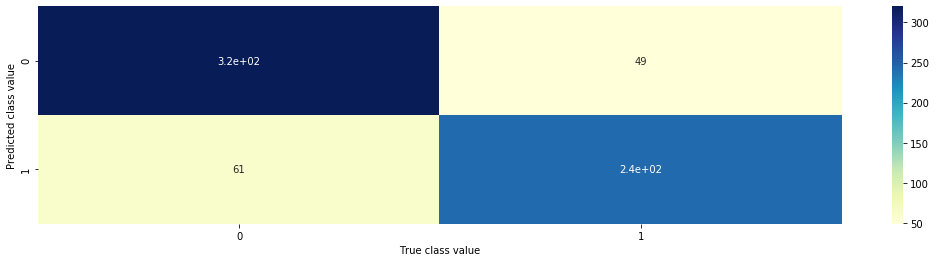

In [ ]:
#Print Confusion Matrix
print("CONFUSION MATRIX")
import seaborn as sns
plt.figure(figsize=(18,4))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')

#### Classification Accuracy (B)

In [ ]:
def score(matrix):
    
    TP = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[1][1]
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy*100

In [ ]:
print("Accuracy of the model is : ", score(matrix), " %")

Accuracy of the model is :  83.67952522255193  %


#### Classification Report

In [ ]:
report = classification_report(Y_test, y_pred, target_names=["Class 0","Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.85       369
     Class 1       0.83      0.80      0.82       305

    accuracy                           0.84       674
   macro avg       0.84      0.83      0.83       674
weighted avg       0.84      0.84      0.84       674



#### ROC curve between FAR Vs GAR  (C) 

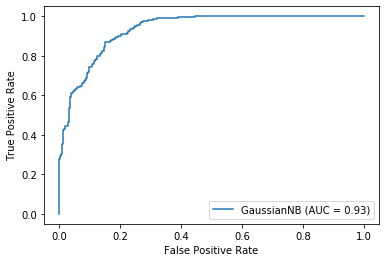

In [ ]:
metrics.plot_roc_curve(clf, X_test, Y_test)
plt.show()

## Gaussian Naive Bayes Classifier (D) 

In [ ]:
# setting priors as mentioned in the question

clf2 = GaussianNB(priors=[0.1, 0.9])

In [ ]:
clf2.fit(X_train, Y_train)

GaussianNB(priors=[0.1, 0.9])

In [ ]:
y_pred = clf2.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

## Evaluation Metrics

#### Confusion Matrix

In [ ]:
matrix = (confusion_matrix(Y_test,y_pred))
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        print(matrix[i][j],end = "     ")
    print()

258     111     
6     299     


CONFUSION MATRIX


Text(141.0, 0.5, 'Predicted class value')

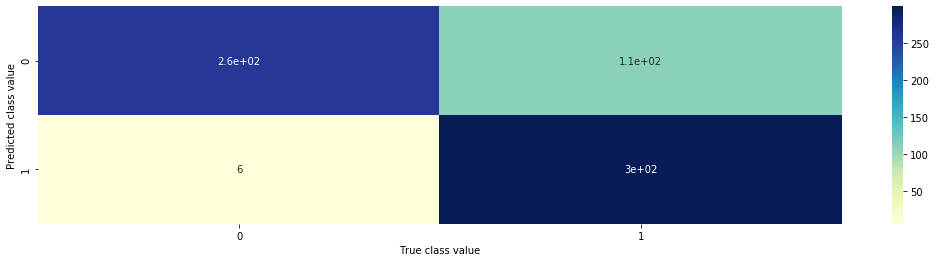

In [ ]:
#Print Confusion Matrix
print("CONFUSION MATRIX")
import seaborn as sns
plt.figure(figsize=(18,4))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')

#### Classification Accuracy (D)

In [ ]:
print("Accuracy of the model is : ", score(matrix), " %")

Accuracy of the model is :  82.64094955489614  %


#### Classification Report

In [ ]:
report = classification_report(Y_test, y_pred, target_names=["Class 0","Class 1"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.98      0.70      0.82       369
     Class 1       0.73      0.98      0.84       305

    accuracy                           0.83       674
   macro avg       0.85      0.84      0.83       674
weighted avg       0.87      0.83      0.82       674



#### ROC Curve Between FAR Vs GAR (D)

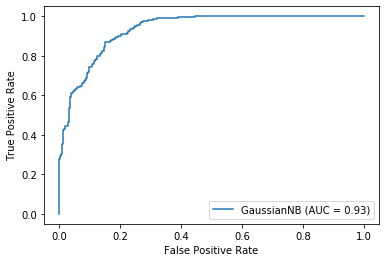

In [ ]:
metrics.plot_roc_curve(clf2, X_test, Y_test)
plt.show()

######   END OF ASSIGNMENT
